<a href="https://colab.research.google.com/github/chandan9t8/StrengthOfConcrete/blob/main/ConcreteCompressiveStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Colab notebook aims to determine the compressive strength of concrete based on two key components: Cement and Water, both measured in kilograms per cubic meter (kg/m³). By developing a predictive model, this project seeks to estimate the concrete compressive strength using the quantities of Cement and Water. Compressive strength is a critical parameter in construction, significantly influencing the durability and safety of structures.

Dataset : https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength



In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#mount drive and read excel data

Mounted at /content/drive


In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
columns = ['Cement (component 1)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)','Concrete compressive strength(MPa, megapascals) ' ]
data = data[columns]

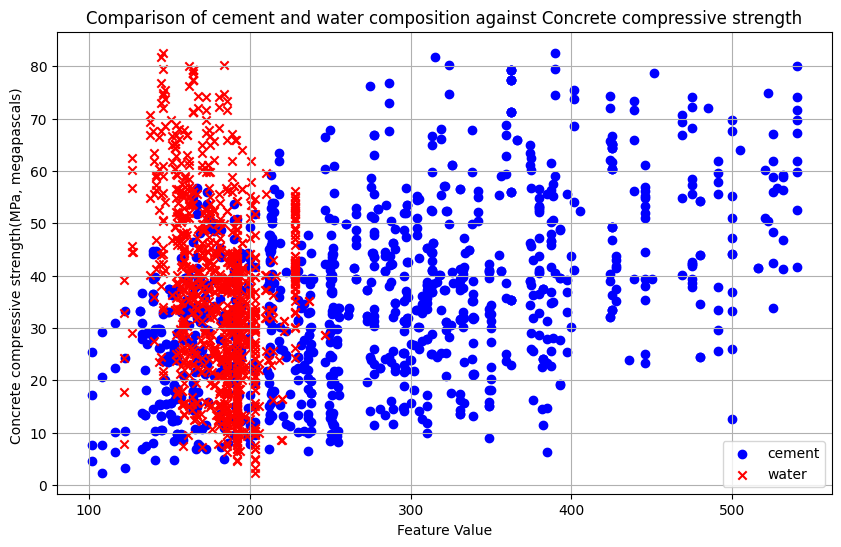

In [11]:
plt.figure(figsize=(10, 6))

# Plot Column1 vs Column3
plt.scatter(data.iloc[:, 0], data.iloc[:, 2], marker='o', linestyle='-', color='b', label=f'cement')

# Plot Column2 vs Column3
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], marker='x', linestyle='-', color='r', label=f'water')

# Add labels and title
plt.xlabel('Feature Value')
plt.ylabel(data.columns[2])
plt.title(f'Comparison of cement and water composition against Concrete compressive strength')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#convert from dataframe to numpy array
data = data.to_numpy()

In [ ]:
x = data[:, :-1]
y = data[:, -1]
print(x.shape, y.shape)

(1030, 2) (1030,)


In [ ]:
#making 1D to 2D
y = np.expand_dims(y, axis=1)
print(x.shape, y.shape)

(1030, 2) (1030, 1)


split the data into train, val and test

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (618, 2)
the shape of the training set (target) is: (618, 1)

the shape of the cross validation set (input) is: (206, 2)
the shape of the cross validation set (target) is: (206, 1)

the shape of the test set (input) is: (206, 2)
the shape of the test set (target) is: (206, 1)


Feature Scaling

In [ ]:
# Initialize the Scaler -- performs z transform
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the 3 data sets then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)
X_cv_scaled = scaler_linear.transform(x_cv)
X_test_scaled = scaler_linear.transform(x_test)

### Regression model

Train the linear model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

Evaluate the model

In [ ]:
#training set

yhat = linear_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, yhat) / 2
print(f"the mean squared error (MSE) for the training set is: {mse}")

#for-loop implementation of MSE

total_squared_error = 0

for i in range(len(yhat)):
  squared_error_i = (yhat[i] - y_train[i]) ** 2
  total_squared_error += squared_error_i
mse = total_squared_error / (2*len(yhat))
print(f"the mean squared error (MSE) for the training set is: {mse.squeeze()}")

the mean squared error (MSE) for the training set is: 95.68988874224743
the mean squared error (MSE) for the training set is: 95.6898887422475


In [ ]:
#validation set

yhat = linear_model.predict(X_cv_scaled)
mse = mean_squared_error(y_cv, yhat) / 2
print(f"the mean squared error (MSE) for the cross validation set is: {mse}") #this is the fair estimate of generalisation error

the mean squared error (MSE) for the cross validation set is: 93.70313203517878


creating polynomial features in the training set

In [ ]:
#instantiate the class
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
print(x_train_mapped[0:50])

[[3.04000000e+02 2.28000000e+02 9.24160000e+04 6.93120000e+04
  5.19840000e+04]
 [3.76000000e+02 2.14600000e+02 1.41376000e+05 8.06896000e+04
  4.60531600e+04]
 [4.01800000e+02 1.47400000e+02 1.61443240e+05 5.92253200e+04
  2.17267600e+04]
 [2.52500000e+02 1.85700000e+02 6.37562500e+04 4.68892500e+04
  3.44844900e+04]
 [1.66800000e+02 2.03500000e+02 2.78222400e+04 3.39438000e+04
  4.14122500e+04]
 [2.52000000e+02 1.85000000e+02 6.35040000e+04 4.66200000e+04
  3.42250000e+04]
 [2.98000000e+02 1.64000000e+02 8.88040000e+04 4.88720000e+04
  2.68960000e+04]
 [3.62600000e+02 1.64900000e+02 1.31478760e+05 5.97927400e+04
  2.71920100e+04]
 [2.18230000e+02 1.40750000e+02 4.76243329e+04 3.07158725e+04
  1.98105625e+04]
 [2.31750000e+02 1.73960000e+02 5.37080625e+04 4.03152300e+04
  3.02620816e+04]
 [3.39000000e+02 1.97000000e+02 1.14921000e+05 6.67830000e+04
  3.88090000e+04]
 [4.25000000e+02 1.53500000e+02 1.80625000e+05 6.52375000e+04
  2.35622500e+04]
 [2.37000000e+02 2.47000000e+02 5.616900

In [ ]:
#scaling the features

scaler_polynomial = StandardScaler()
x_train_mapped_scaled = scaler_polynomial.fit_transform(x_train_mapped)
print(x_train_mapped_scaled[0:50])

[[ 0.22984926  2.18683025  0.04957627  0.96839261  2.39579372]
 [ 0.92731357  1.56037508  0.80650402  1.5577645   1.63532362]
 [ 1.17723829 -1.58125086  1.11674608  0.44589176 -1.48388037]
 [-0.26903147  0.20928892 -0.39350707 -0.1931299   0.15195405]
 [-1.09920774  1.04144579 -0.94905139 -0.8637181   1.04025222]
 [-0.27387497  0.17656365 -0.39740689 -0.20707734  0.11868146]
 [ 0.17172723 -0.80519446 -0.00626571 -0.09042132 -0.82106491]
 [ 0.79750771 -0.76311911  0.65349145  0.47528473 -0.78310962]
 [-0.60100511 -1.89214093 -0.64290854 -1.03092821 -1.72958096]
 [-0.47003681 -0.33956061 -0.54885332 -0.53367119 -0.38945583]
 [ 0.56889441  0.73756828  0.3975064   0.8373877   0.70645569]
 [ 1.40197679 -1.29607351  1.4132985   0.75732914 -1.24852833]
 [-0.41918003  3.07508758 -0.51080691  0.41033965  3.55300629]
 [ 1.40197679 -1.29607351  1.4132985   0.75732914 -1.24852833]
 [-0.40949303  0.17656365 -0.50346335 -0.34124212  0.11868146]
 [ 1.60540388 -0.89869523  1.69607966  1.12068777 -0.90

In [ ]:
poly_model = LinearRegression()
poly_model.fit(x_train_mapped_scaled, y_train)

LinearRegression()

In [ ]:
yhat_poly = poly_model.predict(x_train_mapped_scaled)
mse = mean_squared_error(y_train, yhat_poly) / 2
print(f"the mean squared error (MSE) for the training set is: {mse}")

the mean squared error (MSE) for the training set is: 91.43105325615602


In [ ]:
#converting the val data to polynomial features and then scaling
X_cv_mapped = poly.transform(x_cv)
X_cv_mapped_scaled = scaler_polynomial.transform(X_cv_mapped)

In [ ]:
#predict on val data
yhat_poly_cv = poly_model.predict(X_cv_mapped_scaled)
mse = mean_squared_error(y_cv, yhat_poly_cv) / 2
print(f"the mean squared error (MSE) for the cross validation set is: {mse}")

the mean squared error (MSE) for the cross validation set is: 92.02844833569529


trying different polynomial models to see which one gives the least MSE

In [ ]:
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

for degree in range(1,11):

  #adding features to the training set
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)
  polys.append(poly)

  #scaling the training set
  scaler_poly = StandardScaler()
  x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
  scalers.append(scaler_poly)

  #training the model
  model = LinearRegression()
  model.fit(x_train_mapped_scaled, y_train)
  models.append(model)

  #compute training MSE
  yhat = model.predict(x_train_mapped_scaled)
  train_mse = mean_squared_error(yhat, y_train) / 2
  train_mses.append(train_mse)

  #adding features and scaling the val set
  x_cv_mapped = poly.transform(x_cv)
  x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)
  yhat = model.predict(x_cv_mapped_scaled)
  cv_mse = mean_squared_error(yhat, y_cv) / 2
  cv_mses.append(cv_mse)

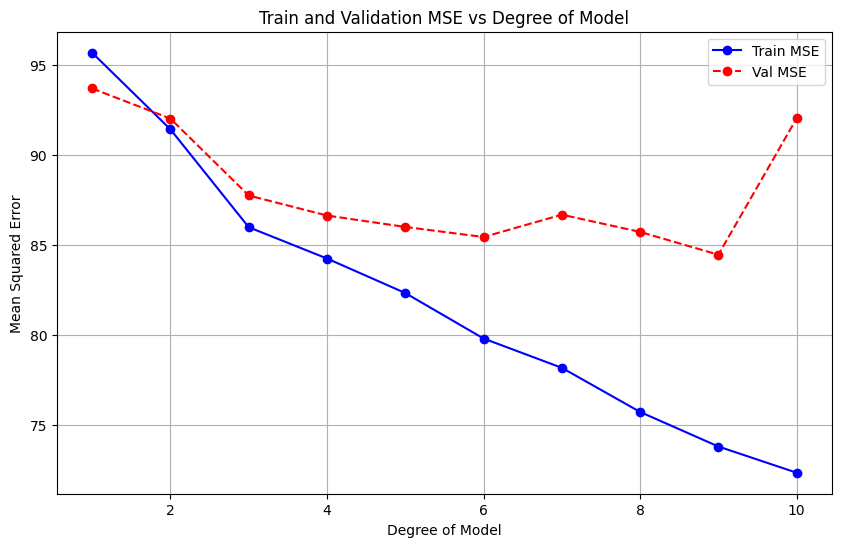

In [ ]:
degrees = range(1,11)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mses, marker='o', linestyle='-', color='b', label='Train MSE')
plt.plot(degrees, cv_mses, marker='o', linestyle='--', color='r', label='Val MSE')

# Add title and labels
plt.title('Train and Validation MSE vs Degree of Model')
plt.xlabel('Degree of Model')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
degree = np.argmin(cv_mses)+1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=9


Generalisation error

In [ ]:
x_test_mapped = polys[degree-1].transform(x_test)
x_test_mapped_scaled = scalers[degree-1].transform(x_test_mapped)
final_model = models[degree-1]

yhat = final_model.predict(x_test_mapped_scaled)
test_mse = mean_squared_error(yhat, y_test) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 73.80
Cross Validation MSE: 84.46
Test MSE: 89.25


### Neural Network

data preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [ ]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

initialising NN with different architectures

In [ ]:
def build_models():

    tf.random.set_seed(20)

    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )

    model_list = [model_1, model_2, model_3]

    return model_list

In [ ]:
nn_train_mses = []
nn_val_mses = []


models = build_models()
for model in models:

  #setting up loss and optimiser
  model.compile(
      loss = 'mse',
      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
  )

  print(f"Training {model.name}...")

  #training
  model.fit(X_train_mapped_scaled, y_train, epochs = 500, verbose=0)

  print("Done!\n")

  #training error
  yhat = model.predict(X_train_mapped_scaled)
  train_mse = mean_squared_error(y_train, yhat) / 2
  nn_train_mses.append(train_mse)

  #validation error
  yhat = model.predict(X_cv_mapped_scaled)
  val_mse = mean_squared_error(yhat, y_cv)
  nn_val_mses.append(val_mse)

for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_val_mses[model_num]:.2f}"
        )

Training model_1...
Done!

7/7 [==============================] - 0s 2ms/step
Training model_2...
Done!

7/7 [==============================] - 0s 2ms/step
Training model_3...
Done!

7/7 [==============================] - 0s 4ms/step
Model 1: Training MSE: 86.49, CV MSE: 173.90
Model 2: Training MSE: 78.74, CV MSE: 171.63
Model 3: Training MSE: 78.34, CV MSE: 173.13


In [ ]:
model_num = 3

#test MSE
yhat = models[model_num - 1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(yhat, y_test) / 2

print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_val_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

7/7 [==============================] - 0s 4ms/step
Training MSE: 78.34
Cross Validation MSE: 173.13
Test MSE: 92.37


In this case, a polynomial model performs a lit bit better compared to a Neural Network with 6 layers. From my understanding this could be because of one of the following reasons:
- **Model Complexity vs. Dataset Complexity** : The polynomial model might be adequately able to capture the relationship between input variables(cement and water) and the output variable(compressive strength). On the other hand Neural networks with many layers can overfit small or relatively simple datasets(which is true in our case).  

- Polynomial models inherently consider interactions between features, which might be crucial in this context. If the relationship between Cement, Water, and Compressive Strength involves significant interactions, a polynomial model can naturally capture these.
- The size and quality of our dataset is more suitable for simpler models. Neural networks typically require large amounts of data to perform well. The dataset is small and our chosen features are not so diverse, hence a simpler model like polynomial regression might generalize better.